In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Read the data

In [6]:
path=("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df = pd.read_csv(path)

#Read the top 5 rows of the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Exploration

In [10]:
#seeing the summary statistics to understand the nature of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Lets Select some feature to explore

In [16]:
cdf = df[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
#Lets list out the top 10 observations in the dataset
cdf.head(10)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,2.0,4,8.5,196
1,2014,2.4,4,9.6,221
2,2014,1.5,4,5.9,136
3,2014,3.5,6,11.1,255
4,2014,3.5,6,10.6,244
5,2014,3.5,6,10.0,230
6,2014,3.5,6,10.1,232
7,2014,3.7,6,11.1,255
8,2014,3.7,6,11.6,267
9,2014,2.4,4,9.2,212


##### Lets now visualize the data

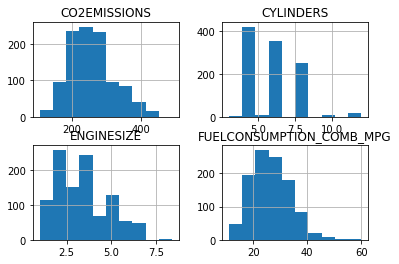

In [13]:
viz = cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']] #Selecting the columns for visualization
viz.hist() #Histogram chart
plt.show() 

##### Lets visualize the data aginst Co2 Emissions to understand the linear dependencies

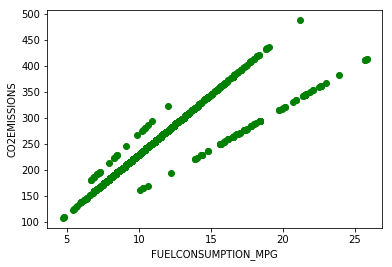

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='green')
plt.xlabel('FUELCONSUMPTION_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

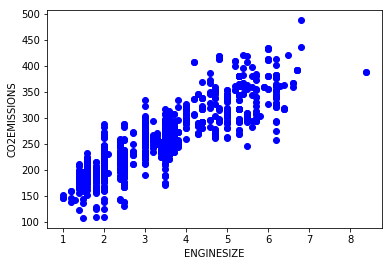

In [18]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

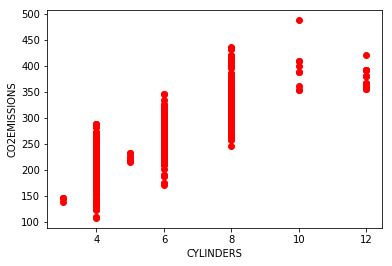

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Finding the correlation between each category

In [29]:
viz.corr()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB_MPG
ENGINESIZE,1.000000,0.934011,0.874154,-0.808554
CYLINDERS,0.934011,1.000000,0.849685,-0.770430
CO2EMISSIONS,0.874154,0.849685,1.000000,-0.906394
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.906394,1.000000


#### Create Train and Test Data set

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model 

### Train data Distribution

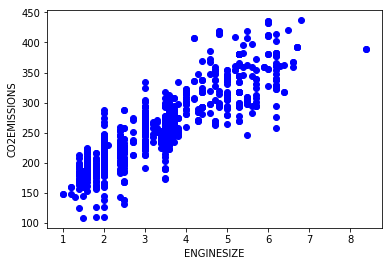

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Modeling using the sklearn package

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#find out the co-efficients

print('Co-efficent: ', regr.coef_)
print('intercept: ', regr.intercept_)

Co-efficent:  [[39.07850907]]
intercept:  [125.77443409]


### Plot outputs

Text(0,0.5,'Emission')

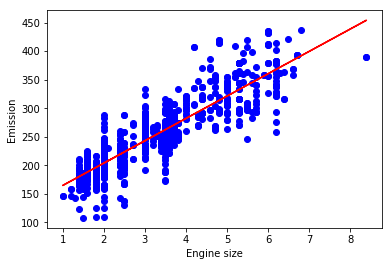

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #Plotting the fit line in red
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

### Now compare the predicted value with the actual values

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.44
Residual sum of squares (MSE): 866.60
R2-score: 0.69


# THE END